## Summary

Code below iterates through our training data, converts each image into an array and resizes them. Final output should be an array of arrays, with each pixel represented as numbers.

In [1]:
import os
from PIL import Image
import numpy as np
import cv2
from matplotlib import pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)

### Compiler Code

In [2]:
STANDARD_SIZE = (200, 100)
rootdir = 'C:\Users\Dallas\OneDrive\MSBA Program\Fall 2016 Courses\Adv Predictive Modeling\APM-Project\TrainImages'
labels = []
image_array = []
dir_list = []

for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        
        img = cv2.imread(os.path.join(subdir, file))
        #img = img[:,:,::-1] #Switch from RBG (default for OpenCV) to RGB
        img = cv2.resize(img,STANDARD_SIZE , interpolation = cv2.INTER_AREA)
        
        image_array.append(img)
        
        label = subdir.split(os.path.sep)[-1]

        label = (label, file)
        labels.append(label)

### Visualize & Check Images

Populating the interactive namespace from numpy and matplotlib


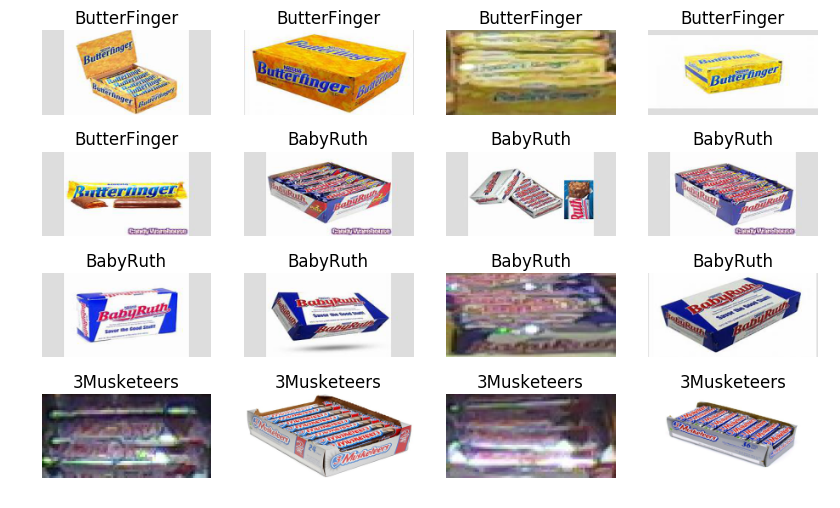

In [21]:
img_zip = zip(labels, image_array)

img_to_show = 16
thumb_size = (0,40)

for label, img in img_zip:
    if img_to_show < 1:
        break
        
    plt.subplot(4, 4, img_to_show)
    plt.axis('off')
    
    img = img[:,:,::-1]
    plt.imshow(img)
    plt.title(label[0])

    img_to_show -= 1
    
plt.show()

### Rack Photos Load

In [33]:
rack_folder = "C:\Users\Dallas\OneDrive\MSBA Program\Fall 2016 Courses\Adv Predictive Modeling\APM-Project\RackImages"
rack = '33'
rack_test = "1476048852942.jpeg"